In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df1 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data')
df2 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data')
df3 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data')
df4 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data')

In [3]:
#Creating the heading of dataset
headline = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']

In [4]:
df1.shape,df2.shape,df3.shape,df4.shape,

((302, 14), (293, 14), (122, 14), (199, 14))

In [5]:
#Adjusting the header data
rowdf1 = list(df1.columns)
rowdf2 = list(df2.columns)
rowdf3 = list(df3.columns)
rowdf4 = list(df4.columns)

df1.loc[302] = rowdf1
df1.columns = headline
df2.loc[293] = rowdf2
df2.columns = headline
df3.loc[122] = rowdf3
df3.columns = headline
df4.loc[199] = rowdf4
df4.columns = headline

# Concatenating all datasets
heart_db = pd.concat([df1,df2,df3,df4])

In [6]:
heart_db.shape, heart_db.dtypes

((920, 14),
 age         object
 sex         object
 cp          object
 trestbps    object
 chol        object
 fbs         object
 restecg     object
 thalach     object
 exang       object
 oldpeak     object
 slope       object
 ca          object
 thal        object
 num         object
 dtype: object)

In [7]:
# Compiling the unique values of each of the variables

colunas = list(heart_db.columns)

for x in colunas: 
  print(x,':', heart_db[x].unique())

age : [67.0 37.0 41.0 56.0 62.0 57.0 63.0 53.0 44.0 52.0 48.0 54.0 49.0 64.0
 58.0 60.0 50.0 66.0 43.0 40.0 69.0 59.0 42.0 55.0 61.0 65.0 71.0 51.0
 46.0 45.0 39.0 68.0 47.0 34.0 35.0 29.0 70.0 77.0 38.0 74.0 76.0 '63.0'
 30 31 32 33 36 '28' 72 73 '32' 75 '63']
sex : [1.0 0.0 '1.0' '1']
cp : [4.0 3.0 2.0 1.0 '1.0.1' '2' '1.1' '4']
trestbps : [160.0 120.0 130.0 140.0 172.0 150.0 110.0 132.0 117.0 135.0 112.0 105.0
 124.0 125.0 142.0 128.0 145.0 170.0 155.0 104.0 180.0 138.0 108.0 134.0
 122.0 115.0 118.0 100.0 200.0 94.0 165.0 102.0 152.0 101.0 126.0 174.0
 148.0 178.0 158.0 192.0 129.0 144.0 123.0 136.0 146.0 106.0 156.0 154.0
 114.0 164.0 '145.0' '120' '140' '170' '100' '105' '110' '125' '130' '150'
 '98' '112' '145' '190' '160' '115' '142' '180' '132' '135' '?' '108'
 '124' '113' '122' '92' '118' '106' '200' '138' '136' '128' '155' '95'
 '165' '80' '185' '126' '152' '116' '0' '144' '154' '104' '134' '178'
 '146' '158' '102' '96' '172' '156' '114' '127']
chol : [286.0 229.0 250.0 204.

## Cleaning and correcting all datasets

CP
Type of chest pain.
* 0: Asymptomatic
* 1: Atypical ischemia
* 2: Non-anginal pain
* 3: Typical ischemia

In [8]:
# CP: chester pain
heart_db['cp'] = heart_db['cp'].replace(['1.0.1','1.1'], 1, regex = True)
heart_db['cp'] = heart_db['cp'].astype(float)
heart_db['cp'] = heart_db['cp'].astype(int)
heart_db['cp'].unique()

array([4, 3, 2, 1])

Age

In [9]:
# Age
heart_db['age'] = heart_db['age'].astype(float)
heart_db['age'] = heart_db['age'].astype(int)

Sex

In [10]:
# Sex
heart_db['sex'] = heart_db['sex'].astype(float)
heart_db['sex'] = heart_db['sex'].astype(int)
heart_db['sex'].unique()

array([1, 0])

Trestbps: Blood pressure in resting

In [11]:
# Trestbps: Blood pressure in resting
key =[]
key2=[]
key3=[]
X = heart_db['trestbps'].tolist()
for i in X:
  if i != '?':
    key.append(i)
print(len(key))
for e in key:
    if type(e)==str:
      e = float(e)
      key2.append(e)
    else:
      key2.append(e)
    media = round(sum(key2)/len(key2),1)
print(len(key2))
for a in X:
  if a == '?':
    a = media
    key3.append(a)
  elif type(a) == str:
    a = float(a)
    key3.append(a)
  else:
    key3.append(a)

print(len(key3),'\n',media)

861
861
920 
 132.1


In [12]:
heart_db['trestbps'] = key3

Cholesterol

In [13]:
# Chol
from collections import Counter
x=list(heart_db['chol'])
Counter(key3).keys()

dict_keys([160.0, 120.0, 130.0, 140.0, 172.0, 150.0, 110.0, 132.0, 117.0, 135.0, 112.0, 105.0, 124.0, 125.0, 142.0, 128.0, 145.0, 170.0, 155.0, 104.0, 180.0, 138.0, 108.0, 134.0, 122.0, 115.0, 118.0, 100.0, 200.0, 94.0, 165.0, 102.0, 152.0, 101.0, 126.0, 174.0, 148.0, 178.0, 158.0, 192.0, 129.0, 144.0, 123.0, 136.0, 146.0, 106.0, 156.0, 154.0, 114.0, 164.0, 98.0, 190.0, 132.1, 113.0, 92.0, 95.0, 80.0, 185.0, 116.0, 0.0, 96.0, 127.0])

In [14]:
key =[]
key2=[]
key3=[]
for i in x:
  if i != '?':
    key.append(i)
print(len(key))
for e in key:
    if type(e)==str:
      e = float(e)
      key2.append(e)
    else:
      key2.append(e)
media = round(sum(key2)/len(key2),1)
print(key2)
for a in x:
  if a == '?':
    a = media
    key3.append(a)
  elif type(a) == str:
    a = float(a)
    key3.append(a)
  else:
    key3.append(a)

print(len(key3),'\n',media)
heart_db['chol'] = key3

890
[286.0, 229.0, 250.0, 204.0, 236.0, 268.0, 354.0, 254.0, 203.0, 192.0, 294.0, 256.0, 263.0, 199.0, 168.0, 229.0, 239.0, 275.0, 266.0, 211.0, 283.0, 284.0, 224.0, 206.0, 219.0, 340.0, 226.0, 247.0, 167.0, 239.0, 230.0, 335.0, 234.0, 233.0, 226.0, 177.0, 276.0, 353.0, 243.0, 225.0, 199.0, 302.0, 212.0, 330.0, 230.0, 175.0, 243.0, 417.0, 197.0, 198.0, 177.0, 290.0, 219.0, 253.0, 266.0, 233.0, 172.0, 273.0, 213.0, 305.0, 177.0, 216.0, 304.0, 188.0, 282.0, 185.0, 232.0, 326.0, 231.0, 269.0, 254.0, 267.0, 248.0, 197.0, 360.0, 258.0, 308.0, 245.0, 270.0, 208.0, 264.0, 321.0, 274.0, 325.0, 235.0, 257.0, 216.0, 234.0, 256.0, 302.0, 164.0, 231.0, 141.0, 252.0, 255.0, 239.0, 258.0, 201.0, 222.0, 260.0, 182.0, 303.0, 265.0, 188.0, 309.0, 177.0, 229.0, 260.0, 219.0, 307.0, 249.0, 186.0, 341.0, 263.0, 203.0, 211.0, 183.0, 330.0, 254.0, 256.0, 407.0, 222.0, 217.0, 282.0, 234.0, 288.0, 239.0, 220.0, 209.0, 258.0, 227.0, 204.0, 261.0, 213.0, 250.0, 174.0, 281.0, 198.0, 245.0, 221.0, 288.0, 205.0, 3

FBS: fasting blood sugar

In [15]:
# FBS: fasting blood sugar
x = heart_db['fbs'].tolist()
#Counter(x).keys(), Counter(x).values()
lista=[]
for i in x:
  if i == '1.0.2':
    lista.append(1.0)
  elif i == '0':
    lista.append(0.0)
  elif i == '1':
    lista.append(1.0)
  else:
    lista.append(i)
len(lista), len(x)

(920, 920)

In [16]:
heart_db['fbs'] = lista
# Logo em seguida é necessário filtrar os valores com '?' nessa coluna.

Restecg: eletrocardiogram result in rest

In [17]:
#Restecg: eletrocardiogram result in rest

x=list(heart_db['restecg'])
Counter(x).keys(), Counter(x).values()

(dict_keys([2.0, 0.0, 1.0, '2.0', '0', '1', '2', '?', '2.1', '0.1', '1.1']),
 dict_values([174, 231, 96, 1, 319, 82, 12, 2, 1, 1, 1]))

In [18]:
lista2 = []

for i in x:
  if i == 1.0 or i == '1' or i == '1.1':
    lista2.append(1.0)
  elif i == 2.0 or i =='2.0'or i=='2' or i=='2.1':
    lista2.append(2.0)
  elif i == 0.0 or i=='0' or i=='0.1':
    lista2.append(0.0)
  else:
    lista2.append(i)
print(len(lista2))

heart_db['restecg']=lista2
print(heart_db['restecg'].unique())
print(Counter(lista2).keys())

920
[2.0 0.0 1.0 '?']
dict_keys([2.0, 0.0, 1.0, '?'])


Tahalch: Maximum heart frequence

In [19]:
# Tahalch: Maximum heart frequence
heart_db['thalach'].head()
x=list(heart_db['thalach'])

In [20]:
key =[]
key2=[]
key3=[]
X = heart_db['thalach'].tolist()
for i in X:
  if i != '?':
    key.append(i)
print(len(key))
for e in key:
    if type(e)==str:
      e = float(e)
      key2.append(e)
    else:
      key2.append(e)
    media = round(sum(key2)/len(key2),1)
print(len(key2))
for a in X:
  if a == '?':
    a = media
    key3.append(a)
  elif type(a) == str:
    a = float(a)
    key3.append(a)
  else:
    key3.append(a)

print(len(key3),'\n',media)

865
865
920 
 137.5


In [21]:
heart_db['thalach'] = key3

Exang: pain induced by exercise

In [22]:
# Exang: pain induced by exercise
x=list(heart_db['exang'])
Counter(x).keys()

dict_keys([1.0, 0.0, '0.0', '0', '1', '?', '0.1', '0.2', '1.2'])

In [23]:
lista=[]
um = [1.0,'1','1.2']
zero =[0.0, '0.0', '0','0.1','0.2']
for i in x:
  if i == 1.0 or i == '1' or i=='1.2':
    lista.append(1.0)
  elif i== 0.0 or i== '0.0' or i== '0' or i=='0.1' or i=='0.2':
    lista.append(0.0)
  else:
    lista.append(i)
print(len(lista), len(x))

heart_db['exang']=lista
heart_db['exang'].unique()

920 920


array([1.0, 0.0, '?'], dtype=object)

Oldpeak: DP depression induced by exercize in relation to rest

In [24]:
# Oldpeak: DP depression induced by exercize in relation to rest
x=list(heart_db['oldpeak'])
Counter(x).keys()

dict_keys([1.5, 2.6, 3.5, 1.4, 0.8, 3.6, 0.6, 3.1, 0.4, 1.3, 0.0, 0.5, 1.6, 1.0, 1.2, 0.2, 1.8, 3.2, 2.4, 2.0, 2.5, 2.2, 2.8, 3.0, 3.4, 6.2, 4.0, 5.6, 2.9, 0.1, 2.1, 1.9, 4.2, 0.9, 1.1, 3.8, 0.7, 0.3, 2.3, 4.4, '2.3', 5.0, '0.2', '.2', '?', '1', '2.8', '0', '-1.1', '1.6', '-1.5', '1.5', '2', '.5', '-.1', '-2.6', '2.1', '.7', '-.7', '2.2', '3', '.1', '.3', '-2', '-1', '1.8', '1.4', '2.6', '.9', '2.4', '1.1', '.4', '2.5', '1.7', '-.8', '-.5', '-.9', '3.7', '1.3', '-0.5', '0.5', '4', '3.5', '0.8'])

In [25]:
lista = []
lista2=[]
lista3=[]
for i in x:
  if i != '?':
    lista.append(i)
for i in lista:
  if type(i) == str:
    i=float(i)
    lista2.append(i)
  else:
    lista2.append(i)
media = round(sum(lista2)/len(lista2),1)
for a in x:
  if a == '?':
    a = media
    lista3.append(a)
  elif type(a) == str:
    a = float(a)
    lista3.append(a)
  else:
    lista3.append(a)

print(len(lista3),'\n',media)
heart_db['oldpeak']=lista3

920 
 0.9


Slope: St slope in peak of exercize

In [26]:
# Slope: St slope in peak of exercize 
x=list(heart_db['slope'])
Counter(x).keys()

dict_keys([2.0, 3.0, 1.0, '3.0', '?', '2', '1', '3', '1.2'])

In [27]:
lista=[]


for i in x:
  if i == 1.0 or i == '1' or i == '1.2':
    lista.append('upsloping')
  elif i == 2.0 or i == '2':
    lista.append('flat')
  elif i == 3.0 or i == '3' or i =='3.0':
    lista.append('downsloping')
  else:
    lista.append(i)
print(len(lista))

heart_db['slope']=lista
heart_db['slope'].unique()

920


array(['flat', 'downsloping', 'upsloping', '?'], dtype=object)

CA: Number of major vessels

In [28]:
# CA: Number of major vessels
y=list(heart_db['ca'])
Counter(y).keys()

dict_keys(['3.0', '2.0', '0.0', '1.0', '?', '0.0.1', '0', '?.1', '1', '2'])

In [29]:
listay=[]
for i in y:
  if i == '0' or i == '0.0.1':
    listay.append(0)
  elif i == '1.0' or i == '1':
    listay.append(1)
  elif i == '2' or i == '2.0':
    listay.append(2)
  elif i == '0' or i == '3.0':
    listay.append(3)
  else:
    listay.append('?')
print(len(listay))
heart_db['ca'] = listay
heart_db['ca'].unique()

920


array([3, 2, '?', 1, 0], dtype=object)

Kind of damage

In [30]:
# Thal
y=list(heart_db['thal'])
Counter(y).keys()

dict_keys(['3.0', '7.0', '6.0', '?', '6', '3', '7', '?.2', '?.1'])

In [31]:
# Thal
lista=[]
for i in y:
  if i == '3.0' or i == '3':
    lista.append('normal')
  elif i == '6.0' or i == '6':
    lista.append('fixed defect')
  elif i == '7' or i =='7.0':
    lista.append('reversable defect')
  else:
    lista.append('?')
print(len(lista))

heart_db['thal']=lista
heart_db['thal'].unique()

920


array(['normal', 'reversable defect', 'fixed defect', '?'], dtype=object)

In [32]:
# Num: Target
x=heart_db['num'].tolist()
lista=[]
for i in x:
  if i == 1 or i =='1.3':
    lista.append('Cardíaco')
  elif i == 0 or i =='0' or i =='0.3':
    lista.append('Nao Cardíaco')
  else:
    lista.append('?')
print(len(lista))
heart_db['num']=lista
heart_db['num'].unique()

920


array(['?', 'Cardíaco', 'Nao Cardíaco'], dtype=object)

### Counting and handling null values

In [33]:
ds_categoric = heart_db.iloc[:,[1,2,5,6,8,10,11,12,13]]
ds_floats = heart_db.iloc[:,[0,3,4,7,9]]
colunas_numeric=ds_floats.columns
colunas_categoric=ds_categoric.columns

In [34]:
# Converting numeric values to object
for i in colunas_categoric:
 ds_categoric[i]=ds_categoric[i].astype(object)
ds_categoric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 0 to 199
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   sex      920 non-null    object
 1   cp       920 non-null    object
 2   fbs      920 non-null    object
 3   restecg  920 non-null    object
 4   exang    920 non-null    object
 5   slope    920 non-null    object
 6   ca       920 non-null    object
 7   thal     920 non-null    object
 8   num      920 non-null    object
dtypes: object(9)
memory usage: 71.9+ KB


C:\Users\rodol\AppData\Local\Temp\ipykernel_10544\1817461545.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_categoric[i]=ds_categoric[i].astype(object)


In [35]:
#counting the amount of null values in numeric columns
for i in colunas_numeric:
  x = list(ds_floats[i])
  dds = 0
  for e in x:
    if e == '?':
      dds+=1
  print(i,':',round(dds/len(x),2)*100,'%')

age : 0.0 %
trestbps : 0.0 %
chol : 0.0 %
thalach : 0.0 %
oldpeak : 0.0 %


In [36]:
#counting the amount of null values in categoric columns
for i in colunas_categoric:
  x = list(ds_categoric[i])
  dds = 0
  for e in x:
    if e == '?':
      dds+=1
  print(i,':',round(dds/len(x),2)*100,'%')

sex : 0.0 %
cp : 0.0 %
fbs : 10.0 %
restecg : 0.0 %
exang : 6.0 %
slope : 34.0 %
ca : 85.0 %
thal : 53.0 %
num : 27.0 %


#### As they have a very large number of null values, the variables 'ca', 'thal', 'slope' were removed from the data set to avoid noise in the forecasts. 

In [37]:
heart_db.drop(columns=(['ca','thal','slope']), axis=1, inplace=True)

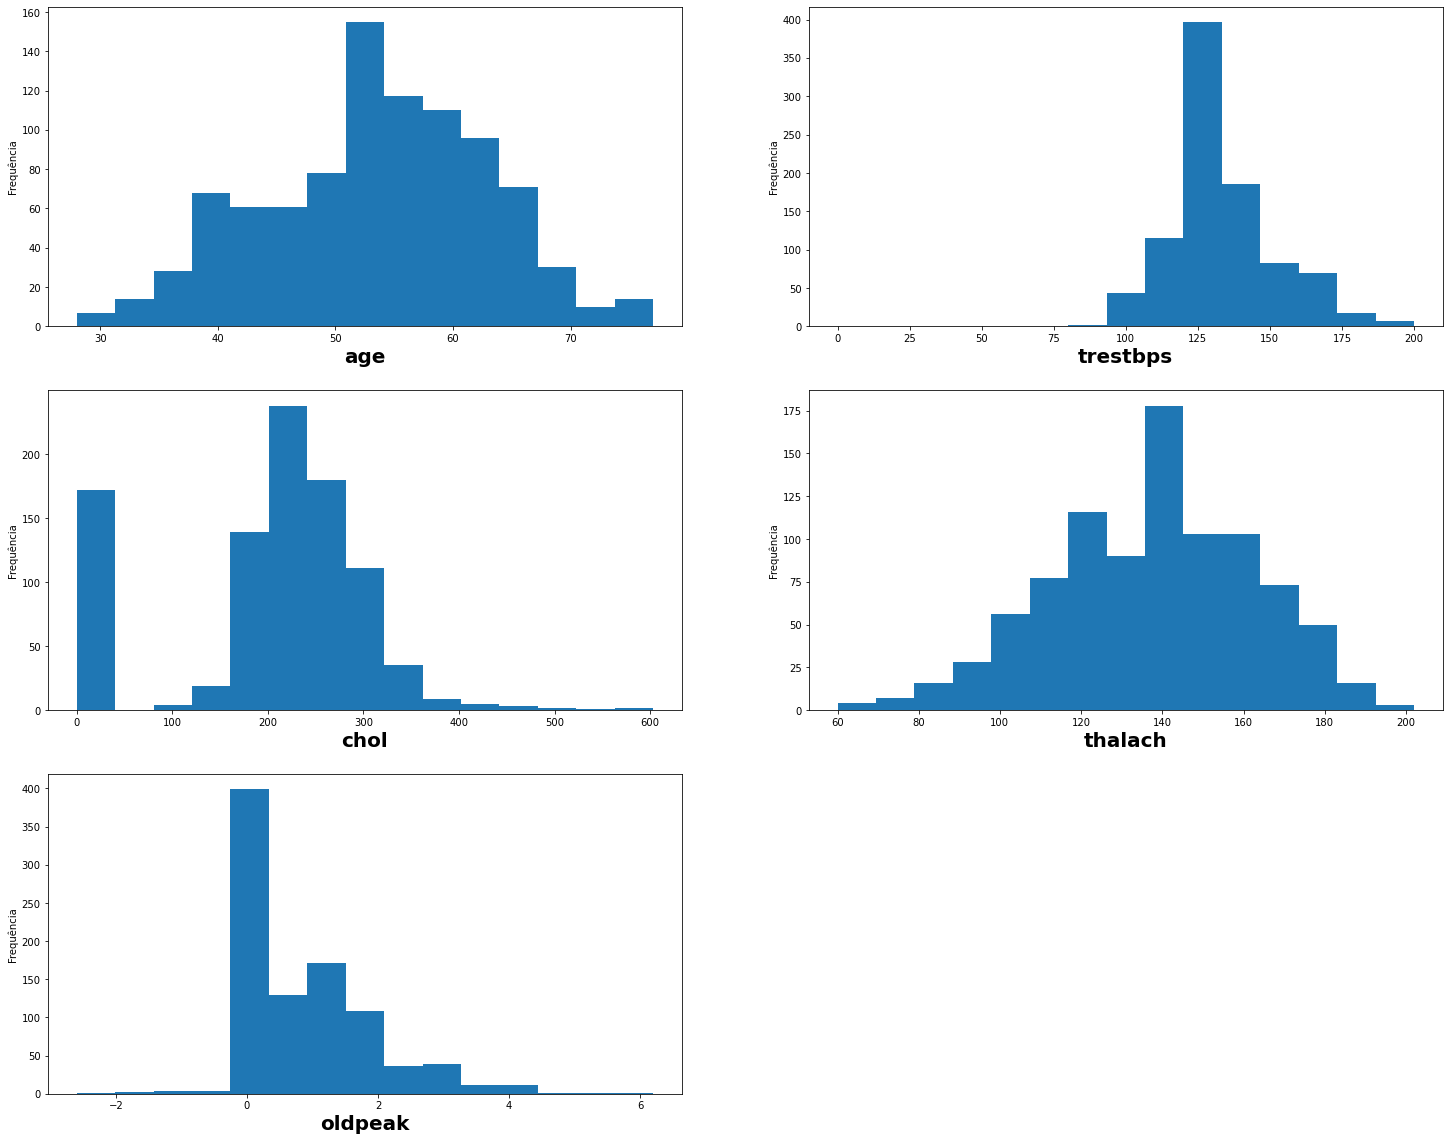

In [38]:
# Ploting frequencies of float and numeric features
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(25,20))

counter = 0 

for i in range(3):
  for j in range(2):

    ax = axes[i][j]

    # Plotar somente quando houver dados
    if counter < len(colunas_numeric):

      ax.hist(ds_floats[colunas_numeric[counter]], bins=15)
      ax.set_xlabel(colunas_numeric[counter], fontsize = 20, fontweight = 'bold')
      ax.set_ylabel('Frequência')

    else:
      ax.set_axis_off()

    counter += 1

plt.show()

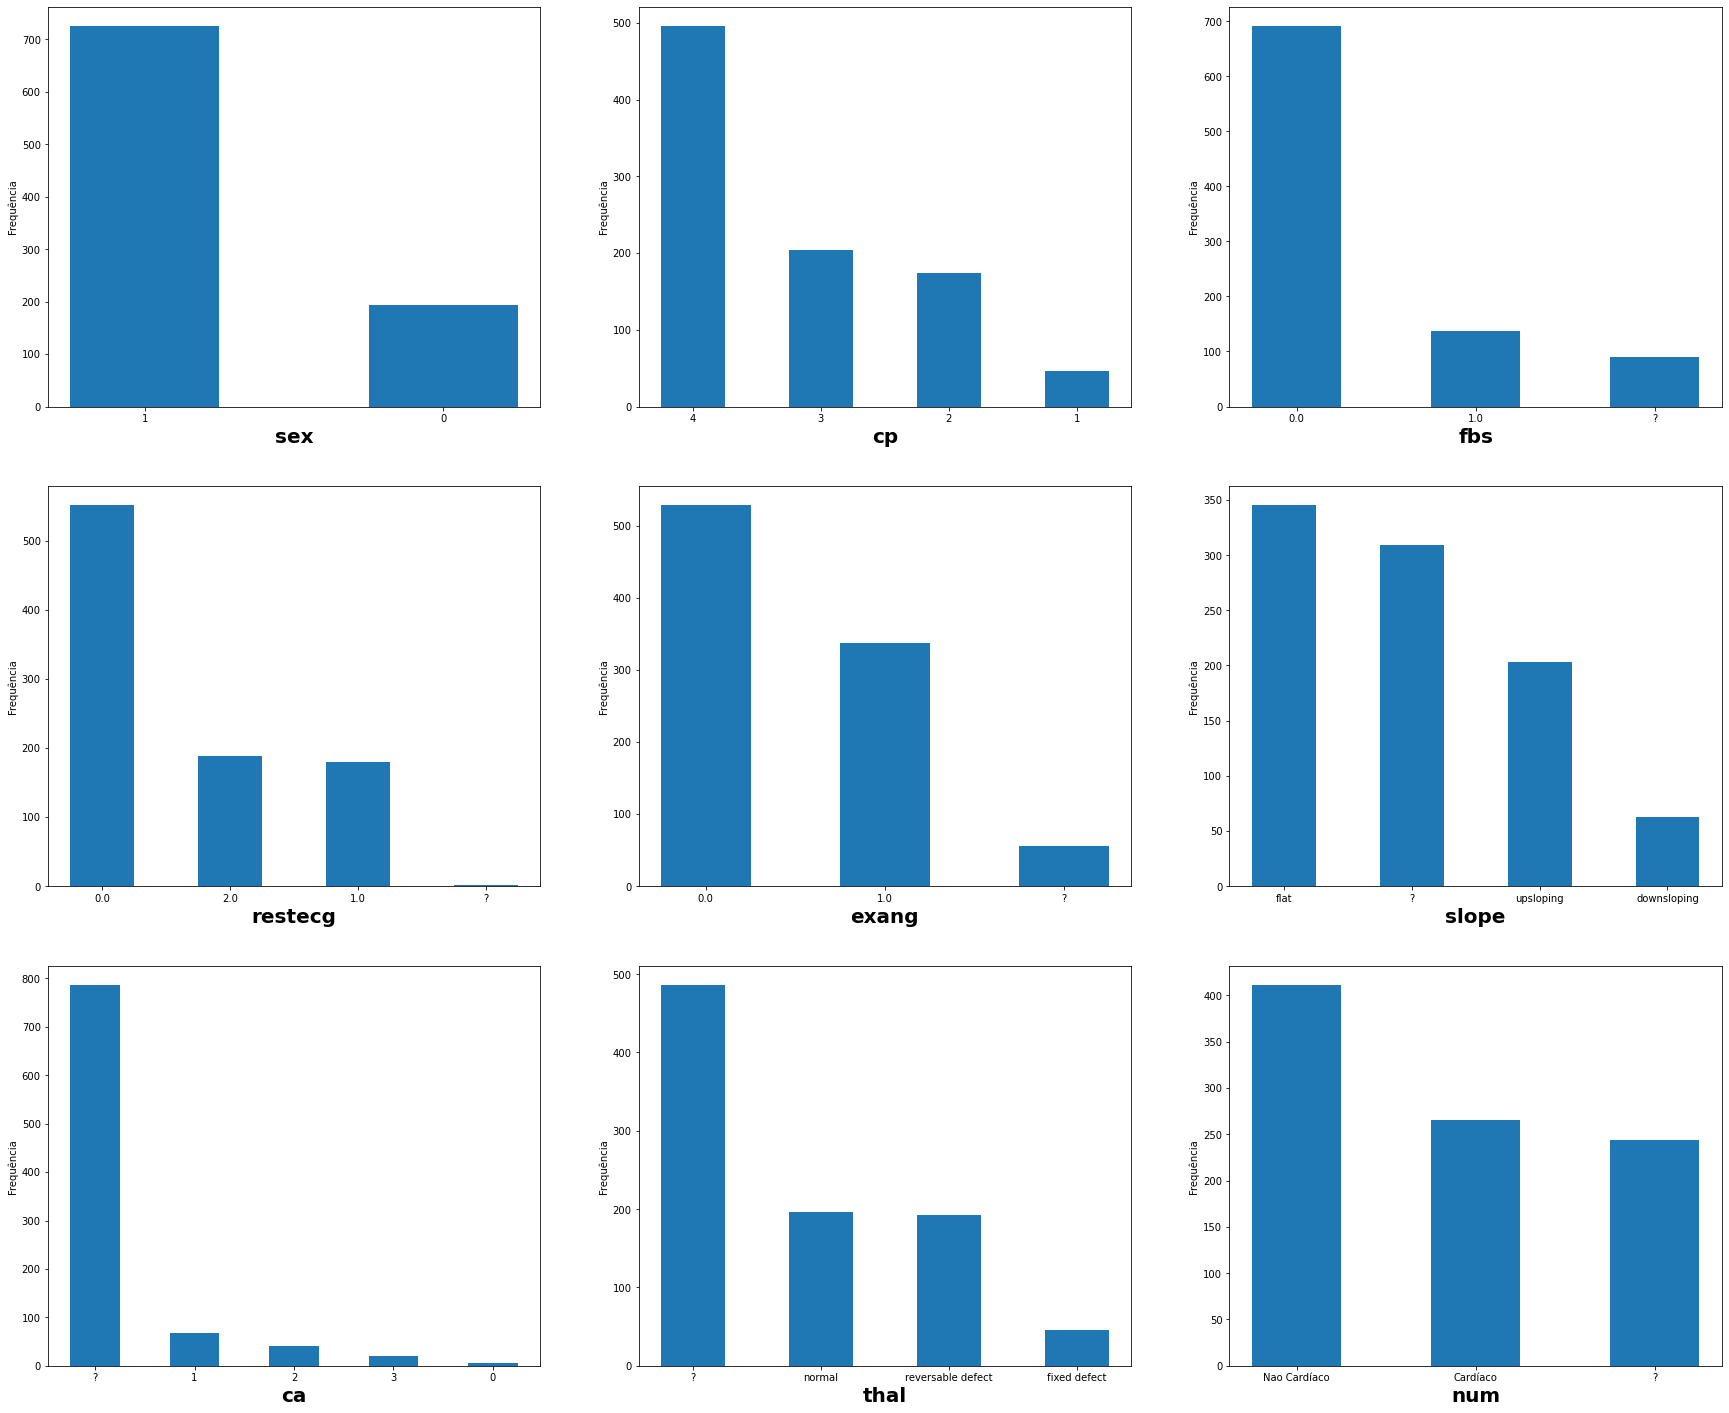

In [39]:
#Ploting frequencies of categoric features
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(30,25))

counter = 0 

for i in range(3):
  for j in range(3):

    ax = axes[i][j]

    # Plotar somente quando houver dados
    if counter < len(colunas_categoric):
      alfa=ds_categoric[colunas_categoric[counter]].value_counts().keys().astype(str)
      beta=ds_categoric[colunas_categoric[counter]].value_counts()

      ax.bar(alfa,beta,width=0.5)
      ax.set_xlabel(colunas_categoric[counter], fontsize = 20, fontweight = 'bold')
      ax.set_ylabel('Frequência')

    else:
      ax.set_axis_off()

    counter += 1

plt.show()

In [40]:
# Deleting null values from target
heart_db=heart_db.query('num != "?"')

In [41]:
Counter(heart_db['fbs']),Counter(heart_db['restecg']),Counter(heart_db['exang'])

(Counter({0.0: 539, 1.0: 83, '?': 54}),
 Counter({2.0: 127, 0.0: 438, 1.0: 109, '?': 2}),
 Counter({1.0: 200, 0.0: 443, '?': 33}))

#### The columns that had few null values ​​only needed to have their rows deleted.

In [42]:
heart_db=heart_db[heart_db['exang']!='?']

In [43]:
heart_db=heart_db[heart_db['fbs']!='?']

In [44]:
heart_db=heart_db[heart_db['restecg']!='?']

In [45]:
heart_db

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
1,67,1,4,120.0,229.0,0.0,2.0,129.0,1.0,2.6,Cardíaco
2,37,1,3,130.0,250.0,0.0,0.0,187.0,0.0,3.5,Nao Cardíaco
3,41,0,2,130.0,204.0,0.0,2.0,172.0,0.0,1.4,Nao Cardíaco
4,56,1,2,120.0,236.0,0.0,0.0,178.0,0.0,0.8,Nao Cardíaco
6,57,0,4,120.0,354.0,0.0,0.0,163.0,1.0,0.6,Nao Cardíaco
...,...,...,...,...,...,...,...,...,...,...,...
188,68,1,3,134.0,254.0,1.0,0.0,151.0,1.0,0.0,Nao Cardíaco
189,51,0,4,114.0,258.0,1.0,2.0,96.0,0.0,1.0,Nao Cardíaco
192,62,1,4,158.0,170.0,0.0,1.0,138.0,1.0,0.0,Cardíaco
194,54,0,4,127.0,333.0,1.0,1.0,154.0,0.0,0.0,Cardíaco


In [46]:
heart_db.reset_index(inplace=True, drop=True)

In [47]:
heart_db

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,67,1,4,120.0,229.0,0.0,2.0,129.0,1.0,2.6,Cardíaco
1,37,1,3,130.0,250.0,0.0,0.0,187.0,0.0,3.5,Nao Cardíaco
2,41,0,2,130.0,204.0,0.0,2.0,172.0,0.0,1.4,Nao Cardíaco
3,56,1,2,120.0,236.0,0.0,0.0,178.0,0.0,0.8,Nao Cardíaco
4,57,0,4,120.0,354.0,0.0,0.0,163.0,1.0,0.6,Nao Cardíaco
...,...,...,...,...,...,...,...,...,...,...,...
583,68,1,3,134.0,254.0,1.0,0.0,151.0,1.0,0.0,Nao Cardíaco
584,51,0,4,114.0,258.0,1.0,2.0,96.0,0.0,1.0,Nao Cardíaco
585,62,1,4,158.0,170.0,0.0,1.0,138.0,1.0,0.0,Cardíaco
586,54,0,4,127.0,333.0,1.0,1.0,154.0,0.0,0.0,Cardíaco


In [48]:
#heart_db.to_csv("heart_data.csv")